## Computational Fluid Dynamics (CFD)

### Lid-driven cavity

The following script computes the solution of the Navier-Stokes problem
in a lid-driven cavity. The pressure and streamfunction are solved using
a SOR approach and the momentum equations are solved using an explicit
time-advancement scheme (Euler method, RK1).

### System setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.append('../src/')

In [3]:
from flow_simulation import FlowSimulation

### Parameters

In [4]:
Re = 1000 # Reynolds Number
SOR = 1.5 # SOR Factor
n_iter = 10 # Max. # of iterations

In [5]:
t0 = 0.00 # Initial time
dt = 0.01 # Time step
tf = 1.00 # Final Simulation Time

In [6]:
Un = 1.0 # upper boundary
Us = 0.0 # bottom plate
Vw = 0.0 # left plate
Ve = 0.0 # right plate

In [7]:
Nxc = 128
Nyc = 128

### Pressure boundary conditions

In [8]:
%%time

fs = FlowSimulation(Re, SOR, n_iter, t0, dt, tf, Un, Us, Vw, Ve, Nxc, Nyc)

X, Y, STREAMLINE, u_contour, v_contour, p_contour, vorticity = (
    fs.simulate_flow()
)

CPU times: user 3min 51s, sys: 1.53 s, total: 3min 52s
Wall time: 4min 5s


In [9]:
# If the plots below don't work, try installing latex as shown below...
# !pip install latex

### Visualize

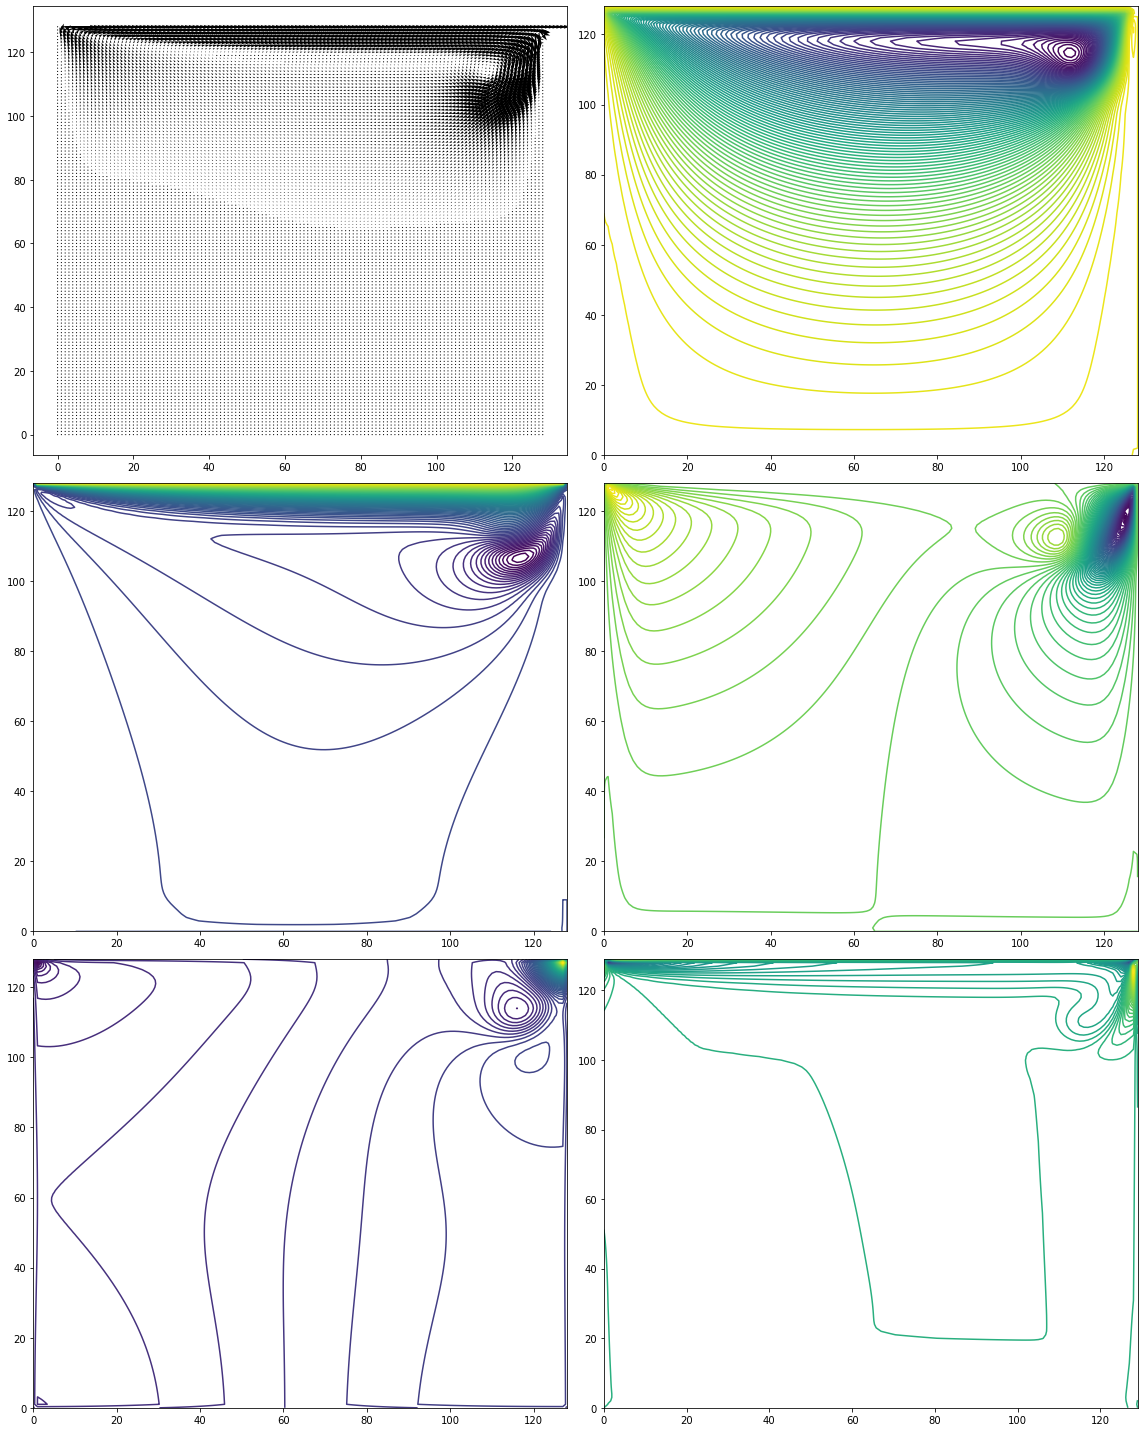

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(16, 20))

ax = ax.ravel()

ax[0].quiver(
    np.flipud(np.rot90(u_contour)),
    np.flipud(np.rot90(v_contour))
)

ax[1].contour(X, Y, STREAMLINE, 100)
ax[2].contour(np.rot90(np.fliplr(u_contour)), 100)
ax[3].contour(np.rot90(np.fliplr(v_contour)), 100)
ax[4].contour(np.rot90(np.fliplr(p_contour)), 100)
ax[5].contour(np.rot90(np.fliplr(vorticity)), 100)

fig.tight_layout()